### **Checkpoint 1: Loading the dataset**

Setting up the appropriate directory and loading the dataset using 02 methods -

1) From Google Drive ; or

2) From Microsoft One-Drive

***1) Importing the file from Google Drive***

In [22]:
import gdown
import os

# Defining the Google Drive URL
url = 'https://drive.google.com/uc?id=1E3tFjahWGeqwUPXyVHCRcGIzL2MI9C9U'

# Defining the output file name
output_file = 'hpc_g.txt'

try:
    # Download the file
    gdown.download(url, output_file, quiet=False)
except Exception as e:
    print("\nFile download unsuccessful:", str(e))

# Check if the file exists
if os.path.exists(output_file):
    print("\n\nFile downloaded successfully.")
else:
    print("\nFile does not exist. Download may have been unsuccessful.")

Downloading...
From: https://drive.google.com/uc?id=1E3tFjahWGeqwUPXyVHCRcGIzL2MI9C9U
To: /content/hpc_g.txt
100%|██████████| 133M/133M [00:00<00:00, 168MB/s]




File downloaded successfully.


In [41]:
import gdown
import os

# Define the Google Drive URL
url = 'https://drive.google.com/uc?id=1E3tFjahWGeqwUPXyVHCRcGIzL2MI9C9U'

# Define the output file name
output_file_g = 'hpc_g.txt'

try:
    # Download the file
    gdown.download(url, output_file_g, quiet=False)
except Exception as e:
    print("File download unsuccessful:", str(e))

# Check if the file exists
if os.path.exists(output_file_g):
    # Check the file size in bytes
    file_size = os.path.getsize(output_file_g)

    # Define a minimum acceptable file size (adjust as needed)
    min_file_size = 500000  # For example, 1 KB

    if file_size > min_file_size:
        print("\n\nFile downloaded successfully.")
    else:
        print(f"File size is too small ({file_size} bytes). Download may have been unsuccessful.")
else:
    print("File does not exist. Download may have been unsuccessful.")


Downloading...
From: https://drive.google.com/uc?id=1E3tFjahWGeqwUPXyVHCRcGIzL2MI9C9U
To: /content/hpc_g.txt
100%|██████████| 133M/133M [00:00<00:00, 155MB/s]



File downloaded successfully.


***2) Importing the file from One Drive***

In [40]:
import requests
import pandas as pd

link = "https://powergrid1989-my.sharepoint.com/:t:/g/personal/60003871_powergrid_in/EXK8plaMjOFGjGVuvCMg0PgBGetWZmiv-H4EM_oW6dpPLQ?download=1"

output_file_o = "hpc_o.txt"

# Send an HTTP GET request to the OneDrive link to download the file
response = requests.get(link)

# Save the file content to a temporary file in runtime
if response.status_code == 200:
    # Save the content to a local CSV file
    with open(output_file_o, "wb") as f:
        f.write(response.content)
else:
    print('Failed to download the file. Status code:', response.status_code)


# Check if the file exists
if os.path.exists(output_file_o):
    # Check the file size in bytes
    file_size = os.path.getsize(output_file_o)

    # Define a minimum acceptable file size (adjust as needed)
    min_file_size = 500000  # For example, 50 MB

    if file_size > min_file_size:
        print("\nFile downloaded successfully.")
    else:
        print(f"File size is too small ({file_size} bytes). Download may have been unsuccessful.")
else:
    print("File does not exist. Download may have been unsuccessful.")




File downloaded successfully.


### **Checkpoint 2: Reading the CSV File in Pandas DF**

In [42]:
import pandas as pd
from IPython.display import display

file_options = ["hpc_o.txt", "hpc_g.txt"]
hpc_df = None

for file in file_options:
    try:
        hpc_df = pd.read_csv(file, sep=';', header=0, low_memory=False, infer_datetime_format=True,
                             parse_dates={'datetime': [0, 1]}, index_col=['datetime'], dtype='float64', na_values=['?'])
        break  # Stop when the first file is successfully read
    except FileNotFoundError:
        continue  # If the file is not found, try the next one

if hpc_df is not None:
    # Data was successfully read from one of the files
    print(" File Loaded Succesfully in hpc_df : ")
    display(hpc_df.head())

else:
    # Both files were not found
    print("No data found in either file.")

 File Loaded Succesfully in hpc_df : 


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [43]:
# Check percentage of missing values in each column
missing_percentage = (hpc_df.isnull().mean() * 100).round(2)

# Check for duplicate rows
duplicate_rows = hpc_df.duplicated().sum()

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicate_rows / len(hpc_df) * 100).round(2)


print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

print("\nPercentage of Duplicate Rows in the DataFrame:", duplicate_percentage)


Percentage of Missing Values in Each Column:
Global_active_power      1.25
Global_reactive_power    1.25
Voltage                  1.25
Global_intensity         1.25
Sub_metering_1           1.25
Sub_metering_2           1.25
Sub_metering_3           1.25
dtype: float64

Percentage of Duplicate Rows in the DataFrame: 8.12


### 🚩 ***`----> It seems that nearly 1.25% of values in all the columns are missing and nearly 8.12% of rows are duplicated`***

In [44]:

# Here we try to impute the NA values with median
hpc_df = hpc_df.fillna(hpc_df.median())

#Also after imputing, we can drop the duplicated rows, if any
hpc_df.drop_duplicates(inplace=True)

missing_percentage = (hpc_df.isnull().mean() * 100).round(2)

# Again checking for duplicate rows
duplicate_rows = hpc_df.duplicated().sum()

# Calculating the percentage of duplicate rows
duplicate_percentage = (duplicate_rows / len(hpc_df) * 100).round(2)

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

print("\nPercentage of Duplicate Rows in the DataFrame:", duplicate_percentage)

Percentage of Missing Values in Each Column:
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
dtype: float64

Percentage of Duplicate Rows in the DataFrame: 0.0


### **Checkpoint 3: Verify loaded data in dataframe**
 Getting the number of rows and columns after removing duplicates

In [45]:
num_rows, num_columns = hpc_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1906699
Number of columns: 7


### **Checkpoint 4: Replace "?" with NaN**

In [46]:
# ? are already repalced during read_csv command, but if there is any, it will replace to NA

hpc_df.replace('?', pd.NA, inplace=True)

### **Checkpoint 5: Convert global active power to watts and calculate sub_metering_4**

Converting active and reactive powers both to Watts and VARs respectively.

In [47]:
hpc_df['Global_active_power'] = (hpc_df['Global_active_power'] * 1000 / 60).round(2)
hpc_df['Global_reactive_power'] = (hpc_df['Global_reactive_power'] * 1000 / 60).round(2)

hpc_df['Sub_metering_4'] = hpc_df['Global_active_power'] - (hpc_df['Sub_metering_1'] + hpc_df['Sub_metering_2'] + hpc_df['Sub_metering_3'])

hpc_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,70.27,6.97,234.84,18.4,0.0,1.0,17.0,52.27
2006-12-16 17:25:00,89.33,7.27,233.63,23.0,0.0,1.0,16.0,72.33
2006-12-16 17:26:00,89.57,8.30,233.29,23.0,0.0,2.0,17.0,70.57
2006-12-16 17:27:00,89.80,8.37,233.74,23.0,0.0,1.0,17.0,71.80
2006-12-16 17:28:00,61.10,8.80,235.68,15.8,0.0,1.0,17.0,43.10


### **Checkpoint 6: Identify the metering consuming maximum power and the months**

In [48]:

max_metering = hpc_df[['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']].max().idxmax()
max_metering_datetime = hpc_df[['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']].max(axis=1).idxmax()
max_val = hpc_df[['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']].max().max()

print(f"Meter consuming maximun Power : {max_metering}")
print(f"Month with maximum power consumption : {max_metering_datetime.strftime('%B, %Y')}")

print(f"Maximum active power consumed by the {max_metering} is : {max_val}")


Meter consuming maximun Power : Sub_metering_1
Month with maximum power consumption : February, 2010
Maximum active power consumed by the Sub_metering_1 is : 88.0


### **Checkpoint 7: Statistics of all fields**

In [50]:
hpc_df.describe().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,1906699.00,1906699.00,1906699.00,1906699.00,1906699.00,1906699.00,1906699.00,1906699.00
mean,19.16,2.20,240.76,4.88,1.21,1.39,6.80,9.76
std,17.83,1.87,3.27,4.49,6.37,6.02,8.54,9.77
min,1.27,0.00,223.20,0.20,0.00,0.00,0.00,-2.40
25%,5.47,0.97,238.87,1.40,0.00,0.00,0.00,4.07
50%,12.43,1.77,240.92,3.20,0.00,0.00,1.00,5.77
75%,26.27,3.37,242.82,6.60,0.00,1.00,18.00,11.13
max,185.37,23.17,254.15,48.40,88.00,80.00,31.00,124.83


### **Checkpoint 8: Box-plot of all sub_meterings**

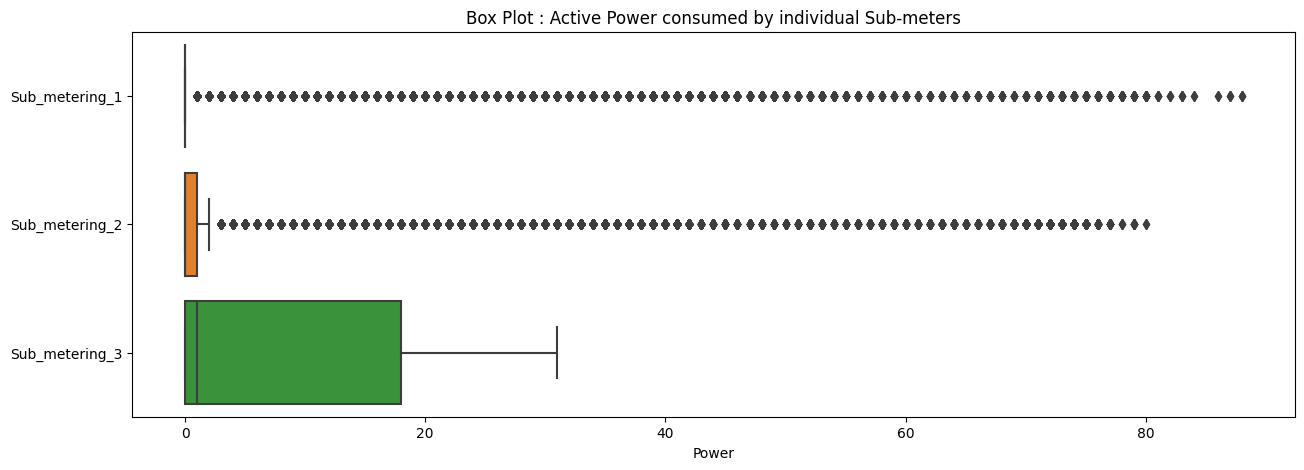

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.boxplot(data=hpc_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], orient="horizontal")

# Setting the labels and title
plt.title('Box Plot : Active Power consumed by individual Sub-meters')
plt.xlabel('Power')

plt.show()


Box Plot shows that most of the readings for Sub-Meter 1/2 are distributed nearby its median however max value recorded beyond 80.0  

### **Checkpoint 8: Box-plot of individual Sub_meters**

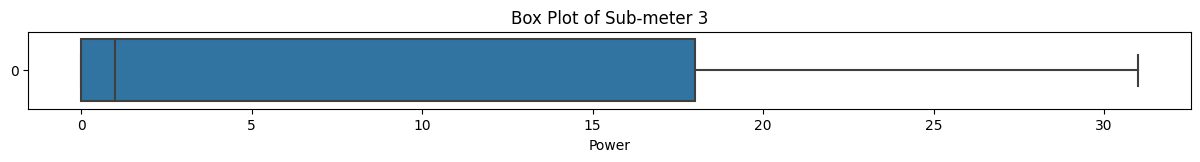

In [52]:
plt.figure(figsize=(15, 1))
sns.boxplot(data=hpc_df['Sub_metering_3'],orient = 'horizontal')

plt.title('Box Plot of Sub-meter 3')
plt.xlabel('Power')

plt.show()

### 🚩 ***`Checking the quantile values for Sub-Meter 1/2 since the median is '0' for both meters`***

In [54]:
Q_1 = hpc_df.Sub_metering_1.quantile([.05, .25, .50, .75, .95, .98, .99])
Q_2 = hpc_df.Sub_metering_2.quantile([.05, .25, .50, .75, .95, .98, .99])

print("Quantile Values for Sub-Meter 1 is : ")
print(Q_1)
print("Quantile Values for Sub-Meter 2 is : ")
print(Q_2)

Quantile Values for Sub-Meter 1 is : 
0.05     0.0
0.25     0.0
0.50     0.0
0.75     0.0
0.95     1.0
0.98    37.0
0.99    38.0
Name: Sub_metering_1, dtype: float64
Quantile Values for Sub-Meter 2 is : 
0.05     0.0
0.25     0.0
0.50     0.0
0.75     1.0
0.95     2.0
0.98    28.0
0.99    37.0
Name: Sub_metering_2, dtype: float64


### **Checkpoint 10: Resampling data for monthly analysis**

In [55]:
monthly_data = hpc_df.resample('M').mean().round(2)
monthly_data.head(10)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,31.86,2.20,241.42,8.07,1.26,2.23,7.45,20.91
2007-01-31,26.19,2.26,240.85,6.65,1.29,1.82,7.52,15.56
2007-02-28,24.53,2.01,240.41,6.22,1.26,1.71,7.08,14.49
2007-03-31,23.40,2.06,240.37,5.94,1.48,2.55,6.98,12.39
2007-04-30,15.89,2.15,239.23,4.10,1.18,1.07,5.21,8.43
2007-05-31,16.78,1.97,235.14,4.39,1.75,1.66,5.27,8.11
2007-06-30,14.13,2.51,238.85,3.69,1.43,1.67,4.50,6.53
2007-07-31,11.76,2.26,237.68,3.11,1.04,1.34,3.72,5.66
2007-08-31,13.96,2.07,237.86,3.63,0.91,1.25,5.59,6.20


### **Checkpoint 11: Plotting a bar chart of monthly averages for Sub-Meter 3**

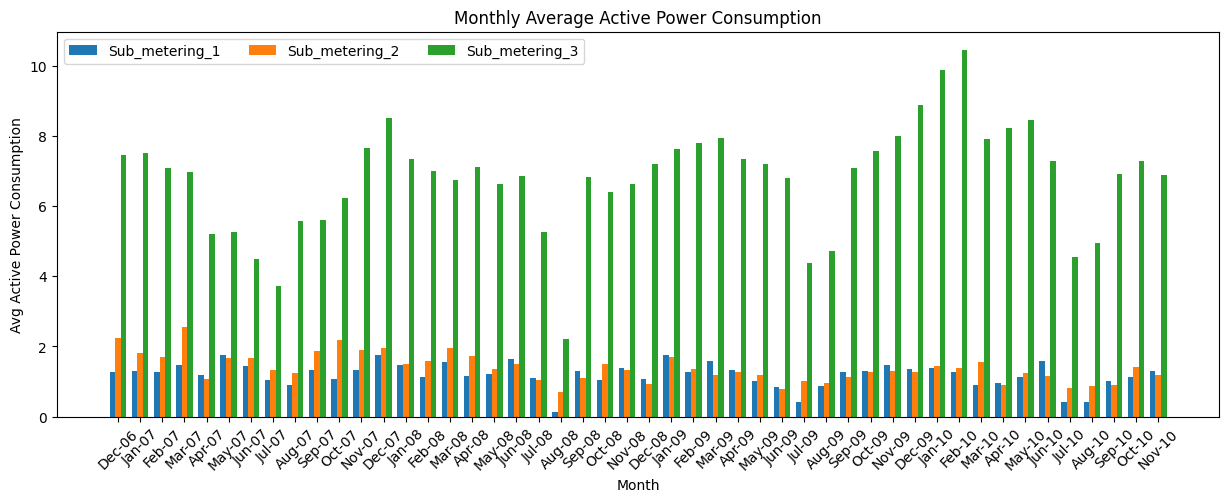

In [56]:
# Plotting a grouped bar chart for all the 03 sub-meters for Monthly Average Active Power Consumption
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Set the positions and width for the bars
positions = range(len(monthly_data.index))
width = 0.25

# Create the grouped bar chart
plt.bar(positions, monthly_data['Sub_metering_1'], width=width, label='Sub_metering_1')
plt.bar([p + width for p in positions], monthly_data['Sub_metering_2'], width=width, label='Sub_metering_2')
plt.bar([p + width * 2 for p in positions], monthly_data['Sub_metering_3'], width=width, label='Sub_metering_3')

# Set x-axis labels and positions
plt.xlabel('Month')
plt.xticks([p + width for p in positions], monthly_data.index.strftime('%b-%y'), rotation=45)


plt.ylabel('Avg Active Power Consumption')
plt.title('Monthly Average Active Power Consumption')
plt.legend(loc='upper left', ncol=3)


plt.show()



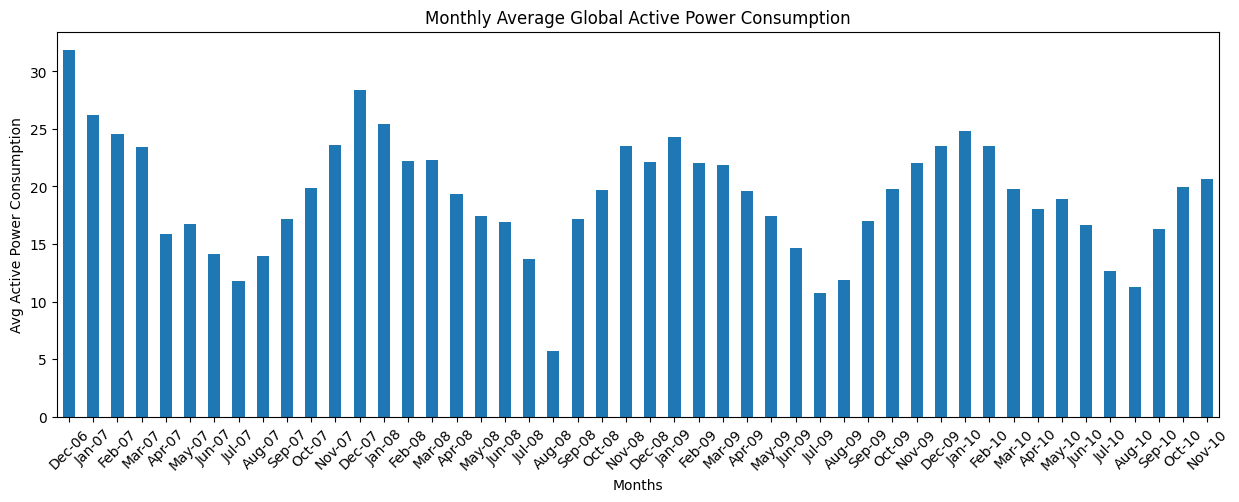

In [57]:
# Plotting Monthly Average Active Power Consumption for Global Active Power

monthly_data['Global_active_power'].plot(kind='bar', figsize=(15,5))
plt.ylabel('Avg Active Power Consumption')
plt.title('Monthly Average Global Active Power Consumption')
plt.xlabel('Months')
plt.xticks(range(len(monthly_data.index)),monthly_data.index.strftime('%b-%y'),rotation=45)

plt.show()

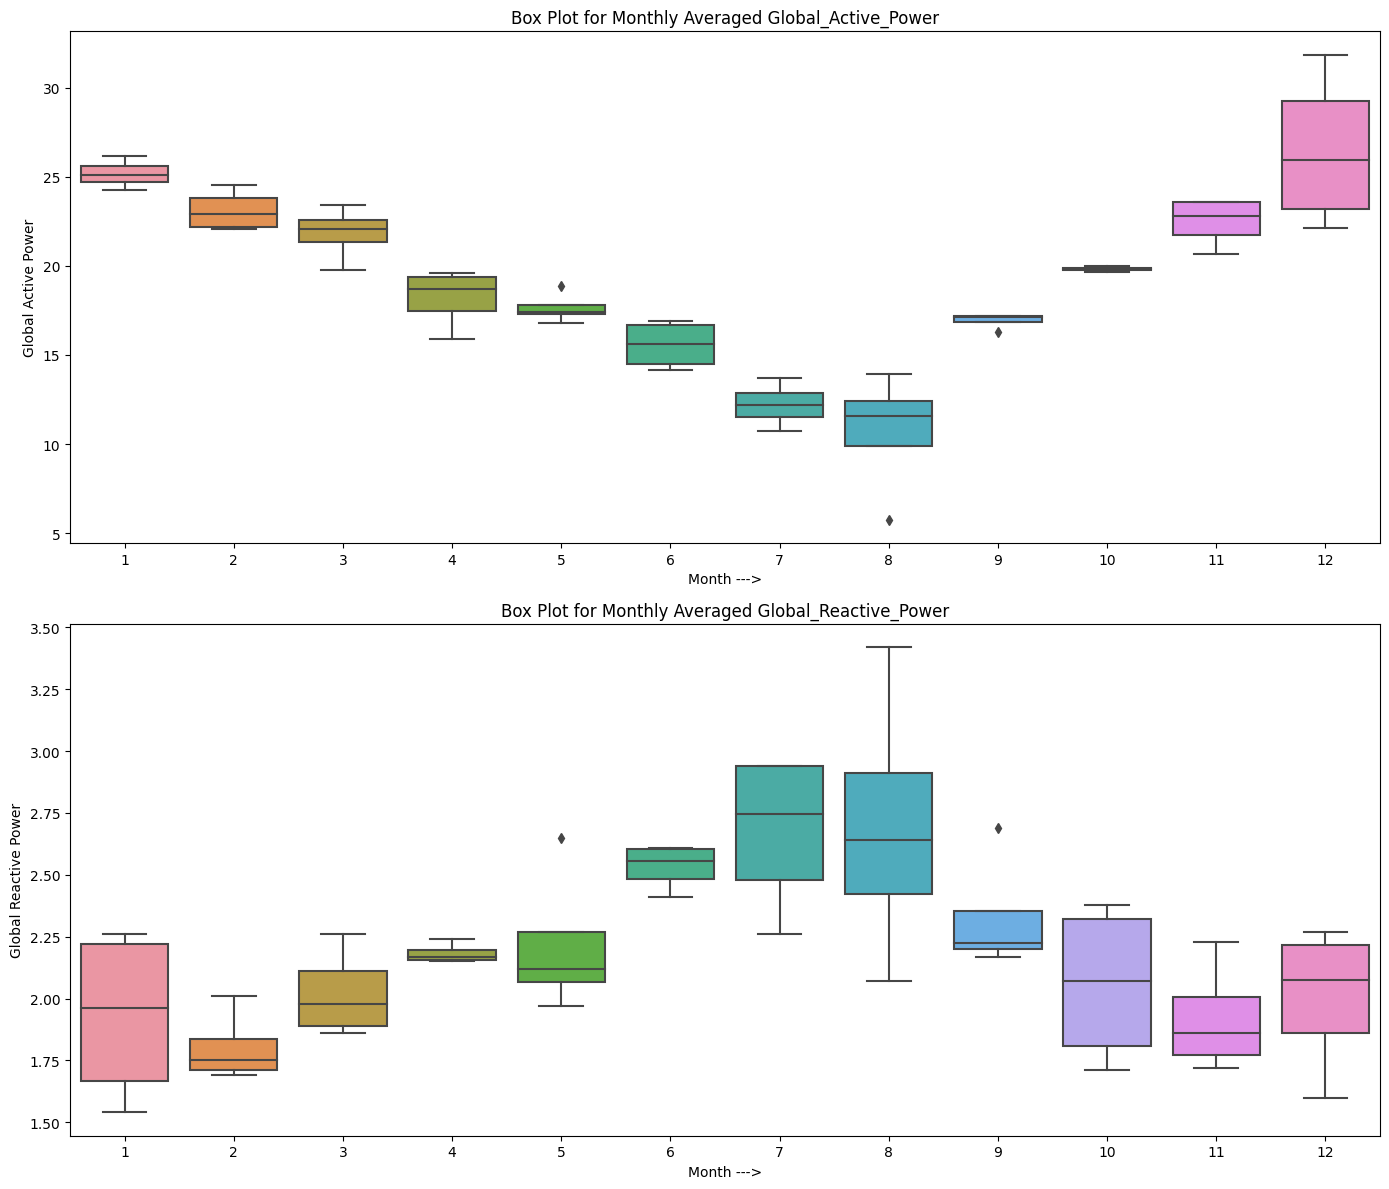

In [88]:
# Plotting Box Plots for Global Active & Reactive Power

import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Box plot for Global_active_power
sns.boxplot(data=monthly_data, y='Global_active_power', x=monthly_data.index.month, ax=axes[0])
axes[0].set_title('Box Plot for Monthly Averaged Global_Active_Power')
axes[0].set_xlabel('Month --->')
axes[0].set_ylabel('Global Active Power')

# Box plot for Global_reactive_power
sns.boxplot(data=monthly_data, y='Global_reactive_power', x=monthly_data.index.month, ax=axes[1])
axes[1].set_title('Box Plot for Monthly Averaged Global_Reactive_Power')
axes[1].set_xlabel('Month --->')
axes[1].set_ylabel('Global Reactive Power')

# Adjust the layout
plt.tight_layout()
plt.show()


### 🚩 *`Every year during the months of June-July-August, the Active-Power Consumption reduces and Reactive Power Consumption plot has spikes indicating that during this period the use of heating elements has been subsequently reduced however, use of Air-Conditioners and other inductive loads has been increased.`*

### 🚩 *`During the months viz. Nov, Dec, Jan, Feb high values of median for Global_Active_Power and low values of Global_Reactive_Power indicates increased usage of heating elements during the winter. `*

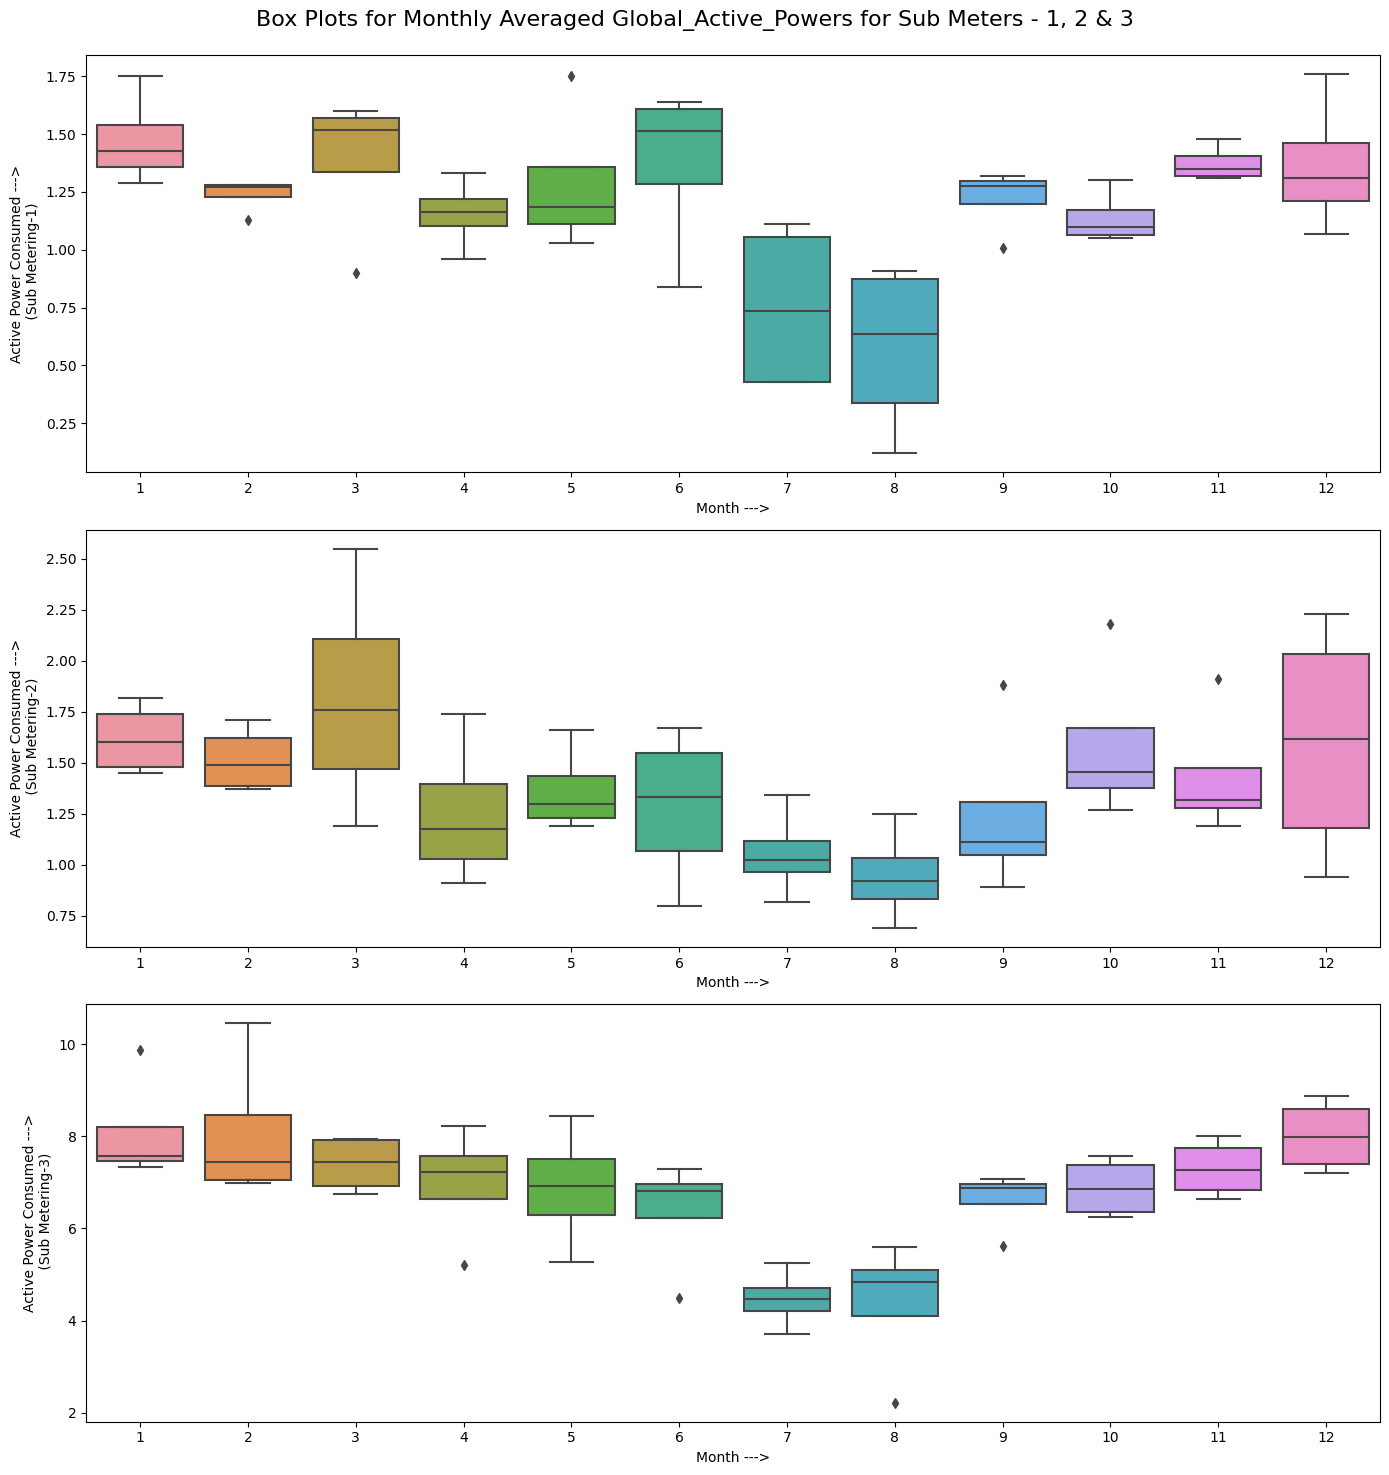

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Title for the entire set of subplots
fig.suptitle('Box Plots for Monthly Averaged Global_Active_Powers for Sub Meters - 1, 2 & 3', fontsize=16)

# Create the first subplot for Sub_metering_1
sns.boxplot(data=monthly_data, y='Sub_metering_1', x=monthly_data.index.month, ax=axes[0])
axes[0].set_xlabel('Month --->')
axes[0].set_ylabel('Active Power Consumed --->\n (Sub Metering-1)')

# Create the second subplot for Sub_metering_2
sns.boxplot(data=monthly_data, y='Sub_metering_2', x=monthly_data.index.month, ax=axes[1])
axes[1].set_xlabel('Month --->')
axes[1].set_ylabel('Active Power Consumed --->\n (Sub Metering-2)')

# Create the third subplot for Sub_metering_3
sns.boxplot(data=monthly_data, y='Sub_metering_3', x=monthly_data.index.month, ax=axes[2])
axes[2].set_xlabel('Month --->')
axes[2].set_ylabel('Active Power Consumed --->\n (Sub Metering-3)')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add space for the common title
plt.show()


### 🚩  ***For Sub-Meter 1 :*** *`In the months of July-August, High variations along the median suggests that the energy consumption for the appliances in the kitchen (like the dishwasher, oven, and microwave) varies significantly during the months. But on the other hand the values are significantly reduced as compared to other months which suggests the family may be out for vacations during the summer.`*

### 🚩 ***For Sub-Meter 2 :*** *` In the months of March and December, High variations along the median suggests that during these season transition months the energy consumption for the appliances like refrigerator etc varies significantly. However, increase in max value and the median suggests increased usage of the appliances like tumble-dryer during winters. `*

### 🚩 ***For Sub-Meter 3 :***  *`Since the dataset provided pertains to a household nearby Paris and in that region the month of Feb corresponds to winter and the month of May corresponds to transition from spring to summer. So, high values of median in Dec, Jan, Feb may signify increased usage of electric water heater howeve, for high variations in May readings signify change in usage patters of Air Conditioner. `*







### **Checkpoint 12: Sorting the top five months with highest active power consumption for Sub-Meter 3**

In [93]:
#Sorting the values in ascending order and printing the last 5 rows for the Sub-Meter-3 (Since, it is comsuming the max. power)

monthly_data.sort_values('Sub_metering_1', ascending = True).tail(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2010-06-30,16.62,2.61,240.81,4.29,1.60,1.16,7.28,6.59
2008-06-30,16.93,2.60,238.94,4.40,1.64,1.51,6.85,6.92
2007-05-31,16.78,1.97,235.14,4.39,1.75,1.66,5.27,8.11
2009-01-31,24.26,1.71,243.71,6.06,1.75,1.71,7.63,13.18
2007-12-31,28.38,1.95,241.60,7.14,1.76,1.97,8.50,16.15


### **Checkpoint 13: Resampling Global reactive power field to obtain monthly data**

In [94]:
# Data frame 'monthly_data' already resampled for all the columns

monthly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-31,31.86,2.20,241.42,8.07,1.26,2.23,7.45,20.91
2007-01-31,26.19,2.26,240.85,6.65,1.29,1.82,7.52,15.56
2007-02-28,24.53,2.01,240.41,6.22,1.26,1.71,7.08,14.49
2007-03-31,23.40,2.06,240.37,5.94,1.48,2.55,6.98,12.39
2007-04-30,15.89,2.15,239.23,4.10,1.18,1.07,5.21,8.43


### **Checkpoint 14: Creating a line plot of monthly reactive power data**

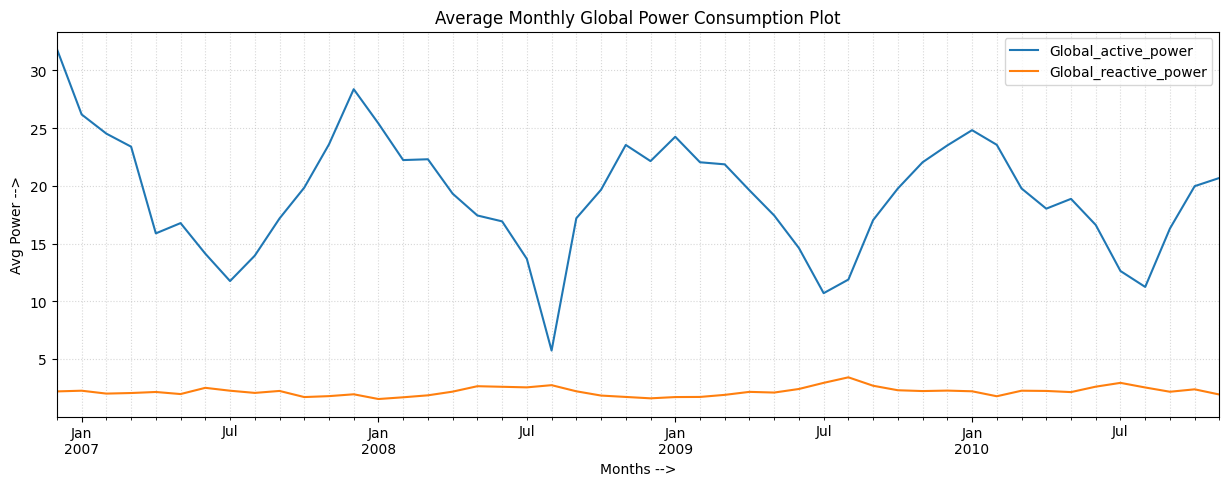

In [95]:
monthly_data[['Global_active_power', 'Global_reactive_power']].plot(kind='line',figsize=(15,5))
plt.xlabel('Months -->')
plt.ylabel('Avg Power -->')
plt.title('Average Monthly Global Power Consumption Plot')

plt.grid(which='both', linestyle=':', alpha=0.5)
plt.show()

### 🚩 *`Every year during the months of June-July-August, the Active-Power Consumption reduces and Reactive Power Consumption plot has spikes indicating that during this period the use of heating elements has been subsequently reduced however, use of Air-Conditioners and other inductive loads has been increased.`*

### **Checkpoint 15: Sorting the top five months with highest reactive power**

In [96]:
# The dataframe (monthly_data) contains the monthly averaged data
# Sorting the dataframe by - Global_reactive_power

monthly_data.sort_values('Global_reactive_power', ascending = True).tail(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2009-09-30,17.04,2.69,241.10,4.36,1.26,1.12,7.08,7.57
2008-08-31,5.74,2.74,240.26,1.62,0.12,0.69,2.22,2.71
2010-07-31,12.63,2.94,240.51,3.29,0.43,0.82,4.54,6.84
2009-07-31,10.71,2.94,242.01,2.82,0.43,1.01,4.38,4.89
2009-08-31,11.89,3.42,241.21,3.15,0.86,0.96,4.73,5.34


### 🚩 ***`Most of the Peaks in Reactive Power Consumption falls in the months of July, August, September that signifies increased use of ACs and other household inductive loads`***

### **Checkpoint 16: Correlation analysis and heatmap**

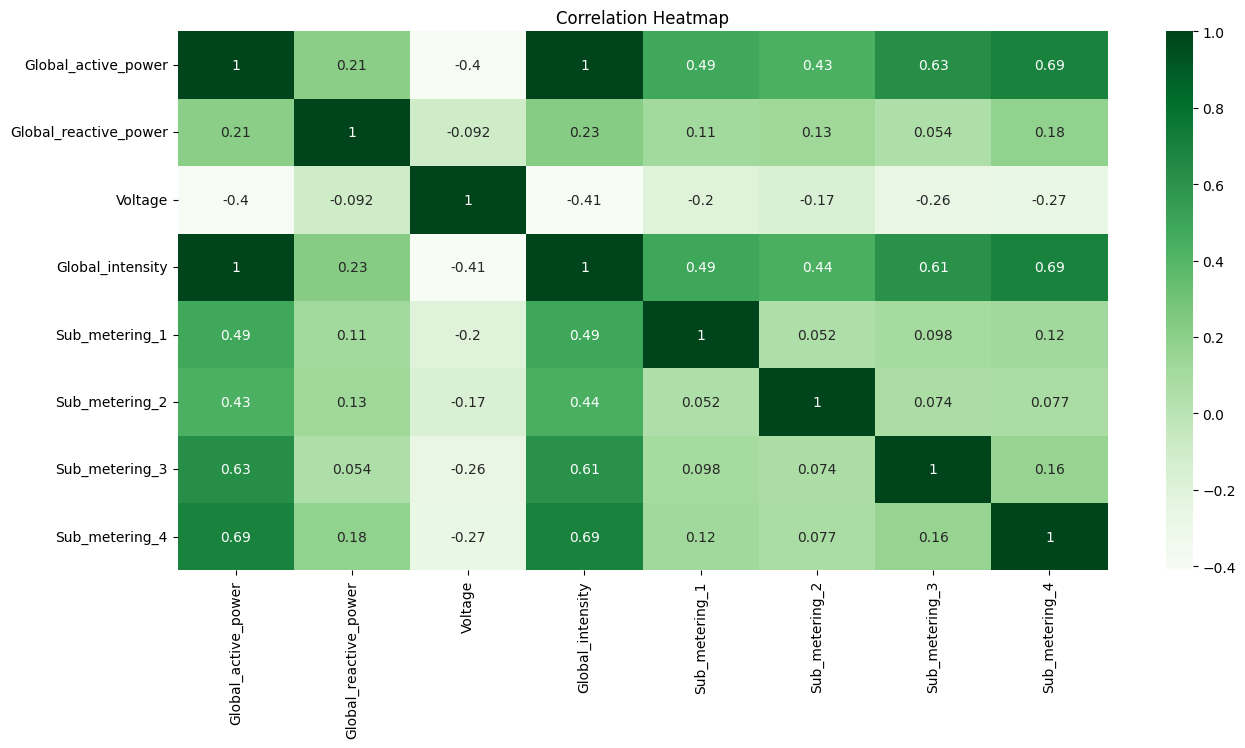

In [97]:
import seaborn as sns

correlation_matrix = hpc_df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')

plt.show()


### 🚩 ***`The Heatmap shows there is a strong correlation between Global Active Power and Current Intensity since for household loads, Active Power is directly proportional to the square of Current Intensity`***

<Figure size 1300x1300 with 0 Axes>

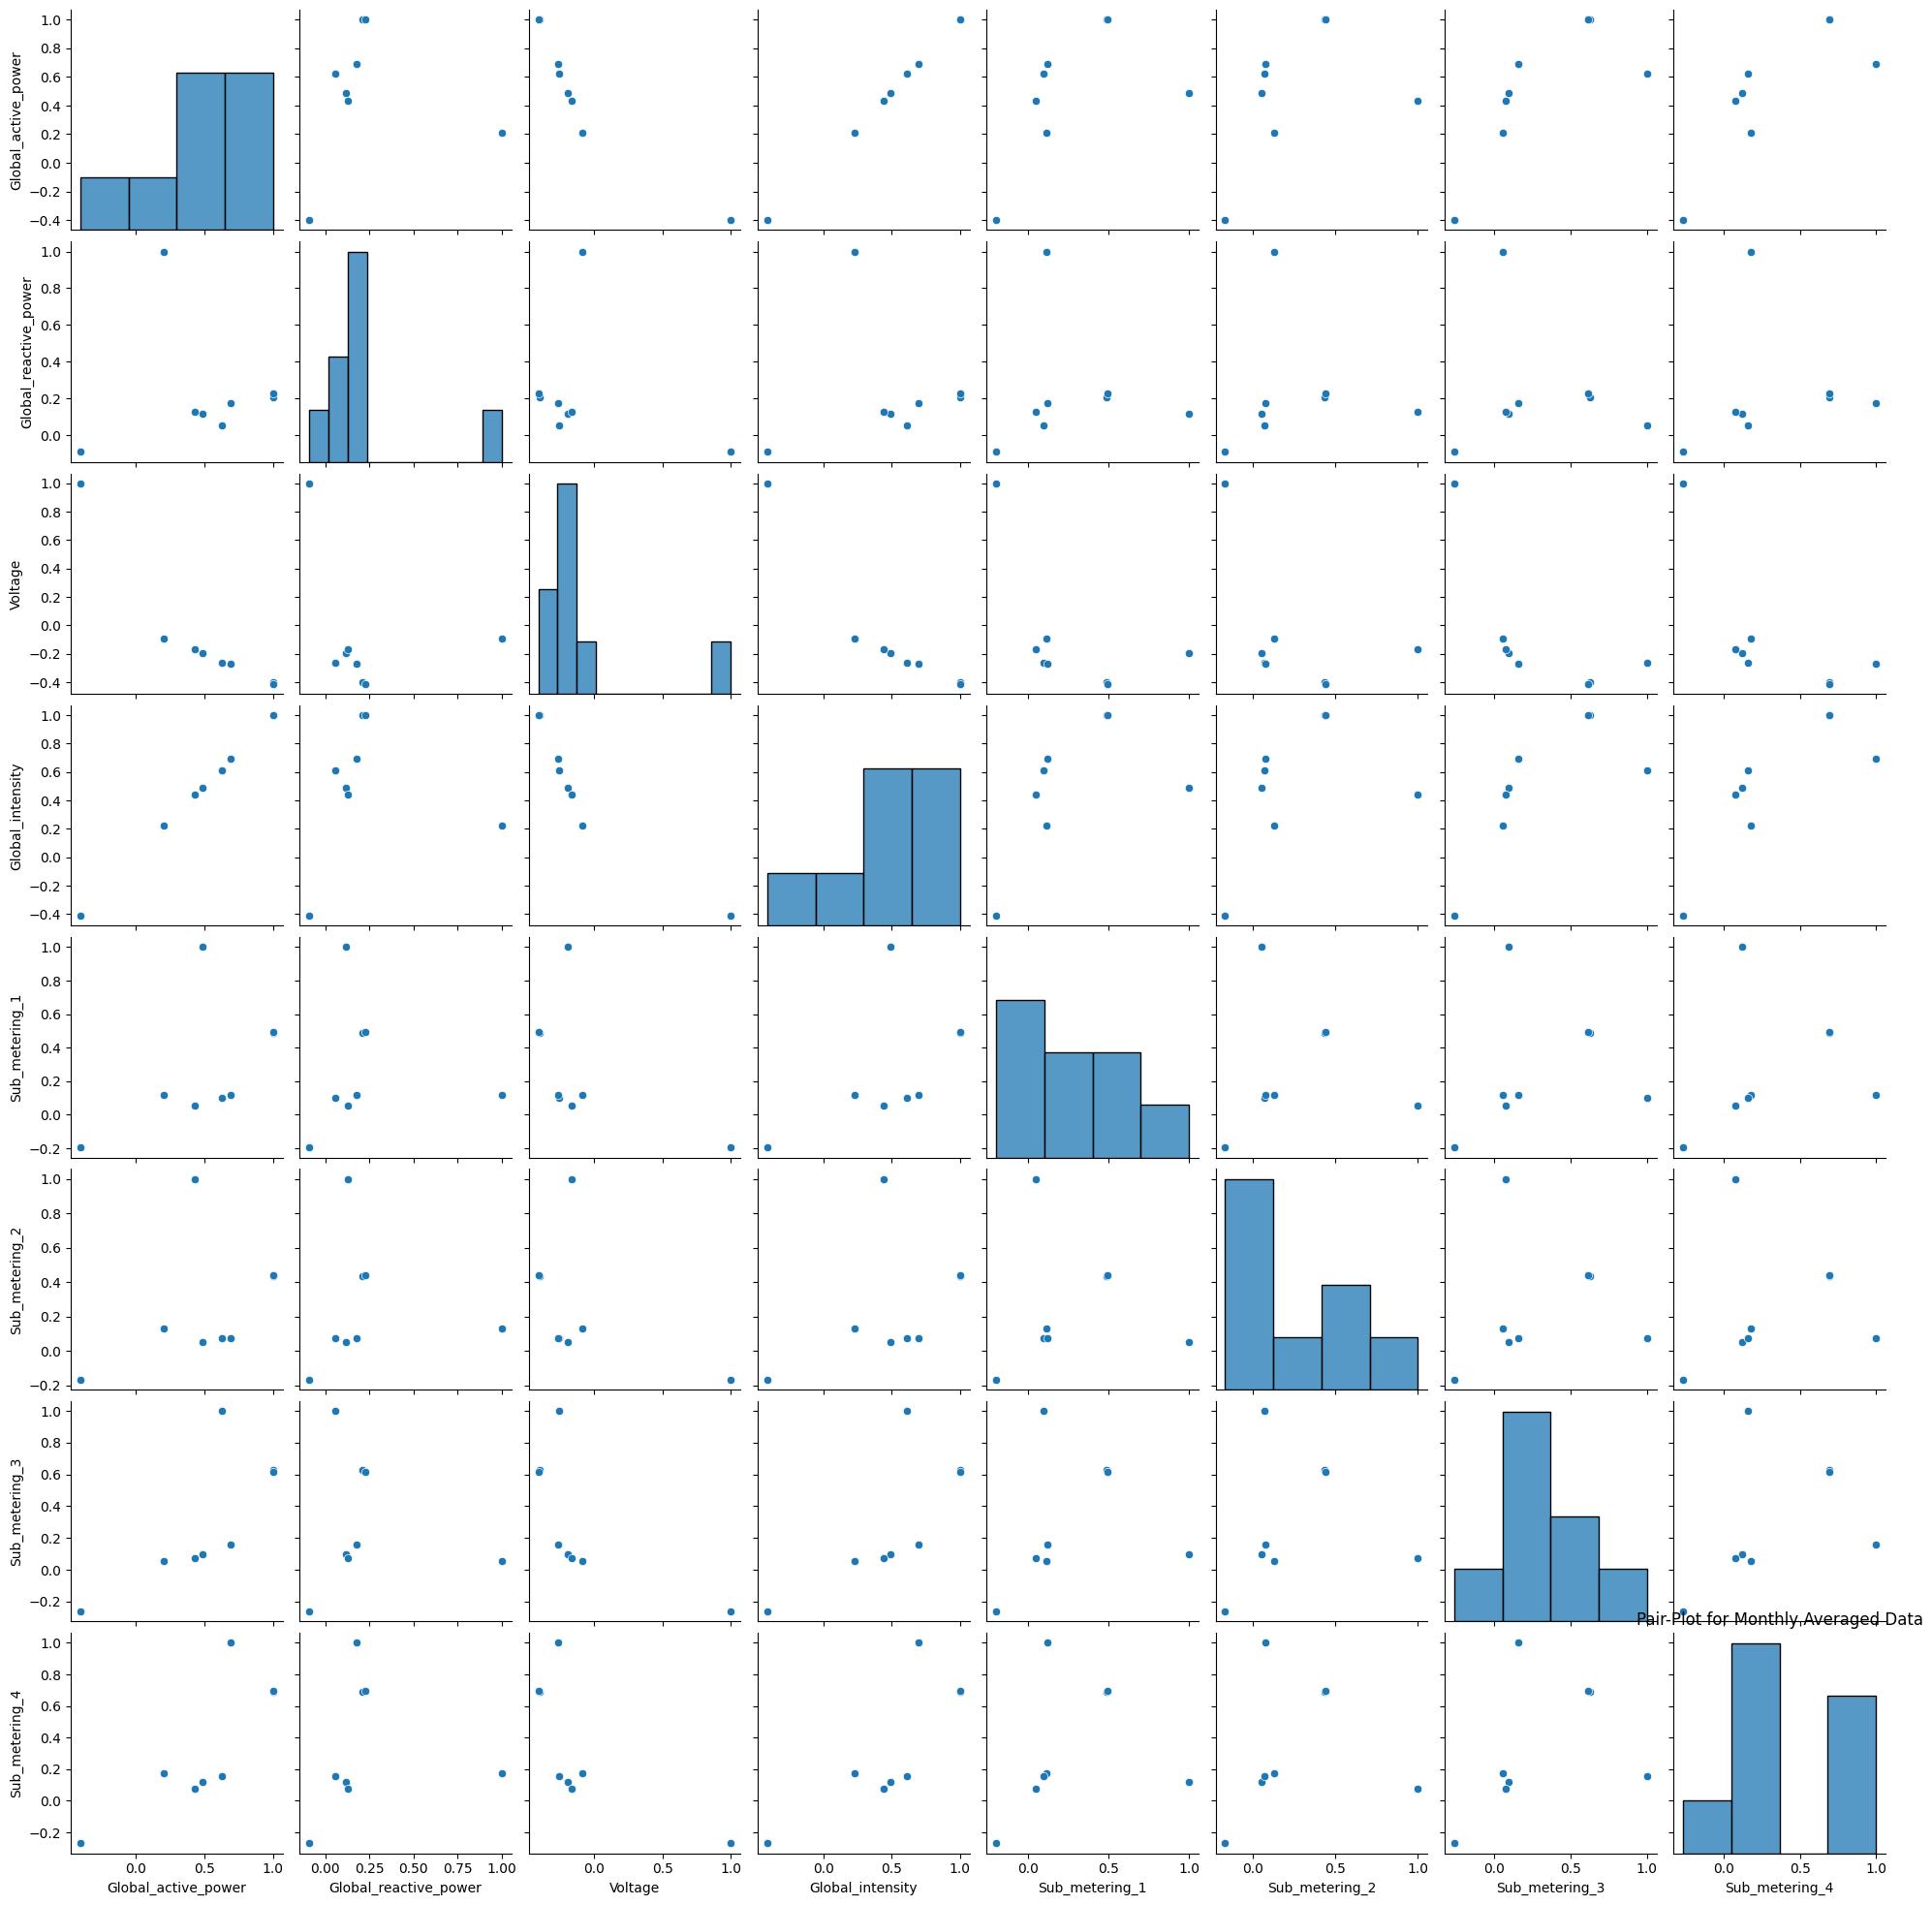

In [101]:
#Plotting Pair-plot for visualisation of above heatmap distribution for Monthly Averaged Data

plt.figure(figsize=(13,13))
sns.pairplot(correlation_matrix)

plt.show()